In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import time

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
s=Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/103.0.5060.53/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\parik\.wdm\drivers\chromedriver\win32\103.0.5060.53]


In [3]:
driver.get('https://www.instagram.com/')

In [4]:
# username and password here
#username = 'SAMPLE USERNAME' 
#password = 'SAMPLE PASSWORD'
# login informations can be input here

In [5]:
wait = WebDriverWait(driver, 6)

In [6]:
def LogIn():
    try :
        #locating username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_name.send_keys('username')
        #locating password box and sending password
        pwd = wait.until(EC.presence_of_element_located((By.NAME,'password')))
        pwd.send_keys('password')
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/div/div/div/button')))
        pop.click()
        
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [7]:
LogIn()

In [9]:
## FOR TURN ON NOTIFICATIONS POP-UP
#r=driver.find_element(By.XPATH,'//*[@id="mount_0_0_+z"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/div/div/div/div[3]/button[2]')
#r.click()

In [58]:

def search_open_profile(s):
    #locatong search box bar and sending text 
    search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaw8')))
    search_box.click()   
    time.sleep(1)
    type_box = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="mount_0_0_xk"]/div/div[1]/div/div[1]/div/div/div/div[1]/div[1]/section/nav/div[2]/div/div/div[2]/input')))
    type_box.clear()
    type_box.send_keys(s)
    time.sleep(1)
    res = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="mount_0_0_xk"]/div/div[1]/div/div[1]/div/div/div/div[1]/div[1]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a')))
    res.click()

In [59]:
search_open_profile('food')

# Problem -1

Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2.Now Find the number of posts these handles have done in the previous 3 days.
3.Depict this information using a suitable graph.

In [11]:
#First 10 handles from part-1
handles_list = ['yourfoodlab','foodie_incarnate','foodmybff','foodporn','foodiewe','foodieshamsi','food',
               'streetfoodrecipe','delhifoodwalks','foodcorps',]

In [12]:
from collections import OrderedDict

In [13]:
def top_5_handles(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #This fuction will search a user and open that profile
            search_open_profile(i)
            time.sleep(2)
            #locating followers of user
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_ac2a')))[1]
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [14]:
top_handles = top_5_handles(handles_list)

In [15]:
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'->',top_handles[uname])

Top 5 instagram handles which have the highest number of followers :
foodie_incarnate -> 1994107
foodmybff -> 1368582
foodiewe -> 1021684
delhifoodwalks -> 311290
yourfoodlab -> 172799


# problem 1.2

 Find the number of posts these handles have done in the previous 3 days.

In [16]:
import datetime

In [20]:
#this function returns number of post posted by user in n days
def count_of_post():
    try :
        #locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        post.click()
        
        count = 0 
        while True :
            #getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe')))
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            #converting into date format
            date = datetime.datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            if (datetime.datetime.now() - date).days > 3 :
                break
            else :
                count += 1
            #locating next button
            time.sleep(1)
            next_but = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="mount_0_0_Qc"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[@class=" _aaqg _aaqh"]/button')))
            next_but.click()
        #closing the post
        close=driver.find_element(By.XPATH,'//*[@id="mount_0_0_Qc"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[2]/div')
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [21]:
total_post_count = {}
for i in top_handles :
    search_open_profile(i)
    time.sleep(1)
    count = count_of_post()
    total_post_count[i] = count

In [22]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodie_incarnate 3
foodmybff 3
foodiewe 0
delhifoodwalks 0
yourfoodlab 5


# Problem 1.3

Depicting  this information using a suitable graph.

In [23]:
from matplotlib import pyplot as plt

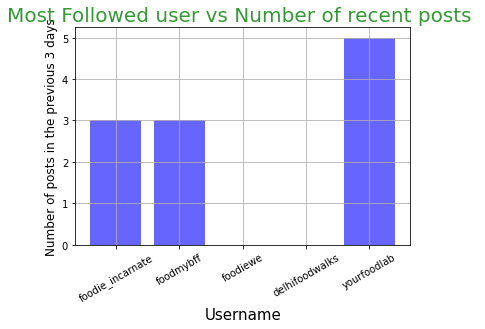

In [24]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='b',alpha=0.6)
plt.xticks(rotation = 30)
plt.ylabel("Number of posts in the previous 3 days",size=12)
plt.xlabel("Username",size=15)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

# Problem 2

Your friend also needs a list of hashtags that he should use in his posts.
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3.Create a csv file with two columns : the word and its frequency
4.Now, find the hashtags that were most popular among these bloggers
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [35]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements(By.CLASS_NAME,'_aagw')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements(By.XPATH,'//*[@id="mount_0_0_Qc"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span/a')
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                close=driver.find_element(By.XPATH,'//*[@id="mount_0_0_Qc"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[2]/div')
                time.sleep(1)
                close.click()
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [36]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)

In [37]:
print(hashtags)

['#foodieincarnate', '#Reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#paan', '#viralfood', '#explore', '#streetfood', '#foodieincarnate', '#amarsirohi', '#foodieincarnate', '#sodelhi', '#newdelhi', '#foodtalkindia', '#delhigram', '#indianfood', '#delhifoodblogger', '#foodgasm', '#foodporn', '#foodpornshare', '#foodlover', '#foodgram', '#foodiesofinstagram', '#foodie', '#indianstreetfood', '#streetfood', '#delhistreetfood', '#streetfoodindia', '#mumbaistreetfood', '#delhifoodie', '#foodblogger', '#indianfoodie', '#desikhana', '#indianfoodblogger', '#indianfoodbloggers', '#delhifood', '#mumbai', '#delhi', '#agra', '#batasha', '#foodieincarnate', '#Reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#dessert', '#mithai', '#indianfood', '#viralfood', '#explore', '#foodieincarnate', '#fruitsalad', '#freshfruit', '#surat', '#foodieincarnate', '#sodelhi', '#newdelhi', '#foodtalkindia', '#delhigram', '#indianfood', '#delhifoodblogger', '#foodgasm', '#foodporn'

In [38]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#foodieincarnate 18
#reels 17
#reelkarofeelkaro 16
#reelsinstagram 16
#explore 16
#streetfood 10
#foodiewe 10
#omgvlogs 10
#instagood 9
#love 9
#Reelitfeelit 8
#viralfood 8
#indianfood 8
#instagram 8
#trending 8
#viral 8
#reelitfeelit 8
#india 8
#photography 8
#fyp 8
#reel 8
#instadaily 8
#like 8
#reelsvideo 8
#memes 8
#foryou 8
#fashion 8
#music 8
#instagramreels 8
#insta 8
#foodgasm 7
#foodporn 7
#foodie 7
#foodblogger 7
#sodelhi 6
#newdelhi 6
#foodtalkindia 6
#delhigram 6
#delhifoodblogger 6
#foodpornshare 6
#foodlover 6
#foodgram 6
#foodiesofinstagram 6
#indianstreetfood 6
#delhistreetfood 6
#streetfoodindia 6
#mumbaistreetfood 6
#delhifoodie 6
#indianfoodie 6
#desikhana 6
#indianfoodblogger 6
#indianfoodbloggers 6
#delhifood 6
#mumbai 6
#delhi 6
#dfwindarjeeling 6
#darjeelingfoodtour 6
#amarsirohi 4
#foodwalkawithanubhav 4
#darjeeling 4
#darjeelingdiaries 4
#dessert 3
#food 3
#paan 2
#agra 2
#batasha 2
#mithai 2
#fruitsalad 2
#freshfruit 2
#surat 2
#hathras 2
#chanachivda 2
#dosa 

In [39]:
import pandas as pd

In [40]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#foodieincarnate,18
1,#reels,17
2,#reelkarofeelkaro,16
3,#reelsinstagram,16
4,#explore,16
5,#streetfood,10
6,#foodiewe,10
7,#omgvlogs,10
8,#instagood,9
9,#love,9


In [41]:
print(words_list[0][0])

#foodieincarnate


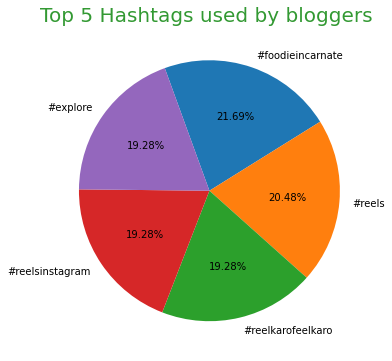

In [42]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

# Problem 3

You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2.Calculate the average likes for a handle.
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4.Create a bar graph to depict the above obtained information.

In [71]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
            likes = []
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements(By.CLASS_NAME,'_aagw')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                try : 
                    #for getting like on video we need to first click on view then only we can like
                    views = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aauw')))
                    views.click()
                    time.sleep(1) 
                    #locating like and clicking on it
                    like = driver.find_element(By.XPATH,'//*[@id="mount_0_0_xk"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div[4]/span')
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                    close1=driver.find_element(By.XPATH,'//*[@id="mount_0_0_xk"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div[1]')
                    close1.click()
                #if the post is image then this part will execute 
                except TimeoutException :
                    like = driver.find_element(By.XPATH,'//*[@id="mount_0_0_xk"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div/span')
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                #locating close button and clicking on it
                close=driver.find_element(By.XPATH,'//*[@id="mount_0_0_xk"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[2]/div')
                time.sleep(1)
                close.click()
                                               
            return likes
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [72]:
dct = {}
for user in handles : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of foodie_incarnate :
14360 Likes
4704 Likes
39458 Likes
39928 Likes
7084 Likes
13553 Likes
33727 Likes
8237 Likes
17166 Likes
17516 Likes

Number of likes of the top 10 posts of foodmybff :
14360 Likes
4704 Likes
39458 Likes
39928 Likes
7084 Likes
13553 Likes
33727 Likes
8237 Likes
17166 Likes
17516 Likes

Number of likes of the top 10 posts of foodiewe :
3130 Likes
3180 Likes
3097 Likes
2474 Likes
2300 Likes
2478 Likes
2602 Likes
4401 Likes
2204 Likes
3473 Likes

Number of likes of the top 10 posts of delhifoodwalks :
7368 Likes
8402 Likes
4489 Likes
9425 Likes
5073 Likes
9379 Likes
14868 Likes
8758 Likes
8757 Likes
10083 Likes

Number of likes of the top 10 posts of yourfoodlab :
15665 Likes
10269 Likes
41554 Likes
27244 Likes
16299 Likes
38779 Likes
4585 Likes
8126 Likes
18343 Likes
17729 Likes



In [73]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [74]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
foodie_incarnate : 19573
foodmybff : 19573
foodiewe : 2933
delhifoodwalks : 8660
yourfoodlab : 19859


In [75]:
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [77]:

#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
foodie_incarnate : 101
foodmybff : 69
foodiewe : 348
delhifoodwalks : 35
yourfoodlab : 8


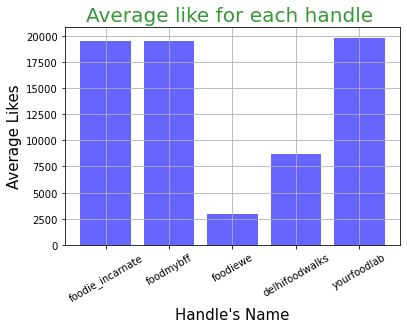

In [79]:
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='b',alpha=0.6)
plt.xticks(rotation=30)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

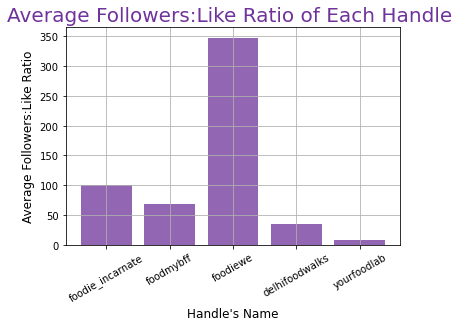

In [81]:
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.xticks(rotation=30)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()